In [4]:
#importing numpy and pandas, seaborn

import numpy as np #linear algebra
import pandas as pd #datapreprocessing, CSV file I/O
import seaborn as sns #for plotting graphs
import matplotlib.pyplot as plt #numerical mathematics extension NumPy
#sklearnb:Scikit-learn (formerly scikits.learn and also known as sklearn)
#is a free software machine learning library for the Python programming language.
from sklearn.linear_model import LinearRegression
#Linear Regression is a kind of modeling technique that helps 
#in building relationships between a dependent scalar variable and one or more independent variables. 
#They are also known as the outcome variable and predictor variables.
from sklearn.model_selection import train_test_split
# splitting data arrays into two subsets: for training data and for testing data
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
#difference between the estimated values and the actual value. 

from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv("C:/Users/Login/Downloads/kc_house_data.csv/kc_house_data.csv")

In [6]:
#Pandas head() method is used to return top n (5 by default) rows of a data frame or series.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
#Pandas shape fucntion isused to return size, shape and dimensions of data frames and series.
#finding no of rows and columns
df.shape

(21613, 21)

In [9]:
#Calling sum() of the DataFrame returned by isnull() will give a series 
#containing data about count of NaN in each column.
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Yes, just two.let's clean it.
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#yes it's clean now. because  sqft_above =0 now

In [13]:
#Finding the count of no of bedrooms.
df['bedrooms'].value_counts()

3     9823
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [14]:
#Finding the count of waterfront.
df['waterfront'].value_counts()

0    21448
1      163
Name: waterfront, dtype: int64

In [15]:
#Finding the count of grade.
df['grade'].value_counts()

7     8980
8     6067
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [16]:

#Finding the count of condition.
df['condition'].value_counts()

3    14030
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64

In [17]:
# Resize the plot

def resizeplot(l,a):
    plt.figure(figsize=(l,a))

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

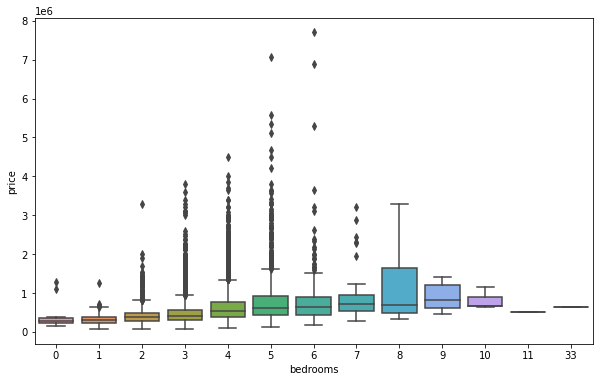

In [18]:
#Relating the number of bedrooms  with the price.
resizeplot(10,6)
sns.boxplot(x='bedrooms',y='price',data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

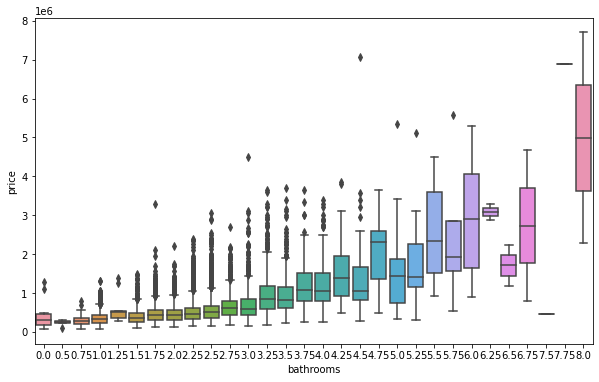

In [19]:
resizeplot(10,6)
sns.boxplot(x='bathrooms',y='price',data=df)

In [20]:
#We can see that the residences have more houses with 3 and 4 bedrooms than the others,
#which leads us to realize that there are several other attributes that value the house and not just bedrooms and bathrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

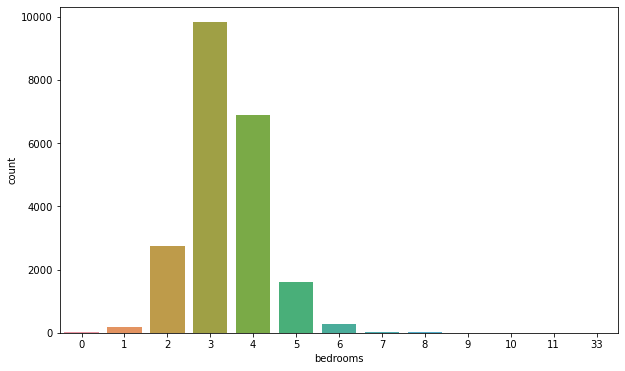

In [21]:
resizeplot(10,6)
sns.countplot(x='bedrooms',data=df)

C:\Users\Login\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='count'>

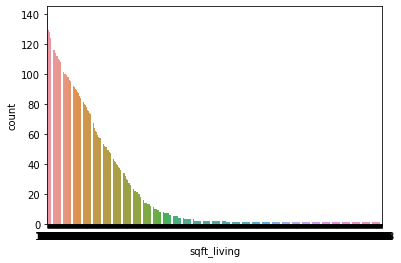

In [22]:
#A barplot is plotted between sqft living and prices to get an overview of how the price changes with sqft.

sns.countplot(df.sqft_living,order=df['sqft_living'].value_counts().index)


<AxesSubplot:xlabel='waterfront', ylabel='count'>

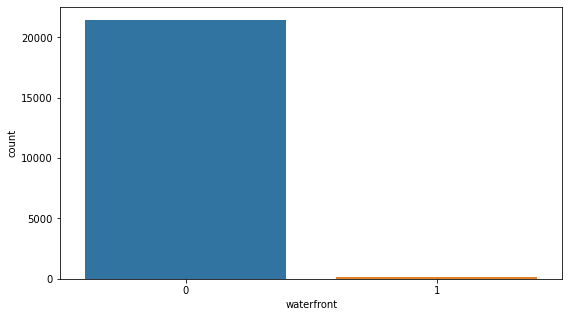

In [23]:
#..and much less waterfront houses.
resizeplot(9,5)
sns.countplot(x='waterfront',data=df)

In [24]:
def resizeplot(l,a):
    plt.figure(figsize=(l,a))

<AxesSubplot:xlabel='price', ylabel='Count'>

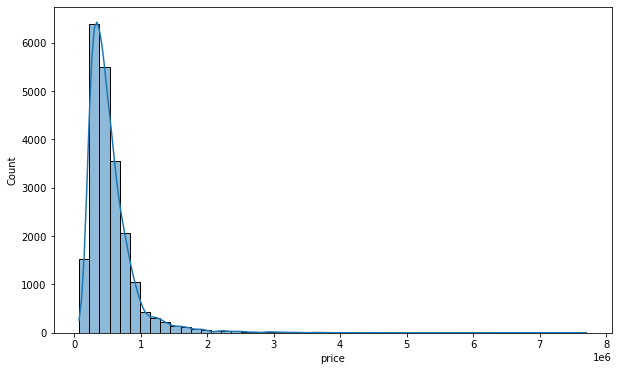

In [25]:
#Starting the visualizations with distplot we can see a density of the Price
#but if you notice we can see a little bit outliers over 2 million.
#A histogram is an approximate representation of the distribution of numerical data
resizeplot(10,6)
sns.histplot(df['price'],kde=True,bins=50)


In [26]:
#Heatmaps visualize the data in 2-D colored maps making use of color variations like hue, 
#saturation, or luminance. Heatmaps describe relationships between variables in form of colors instead of numbers.

#These variables are plotted on both axes. The color changes describe the relationship between
#two values according to the intensity of the color in a particular block. 

<AxesSubplot:>

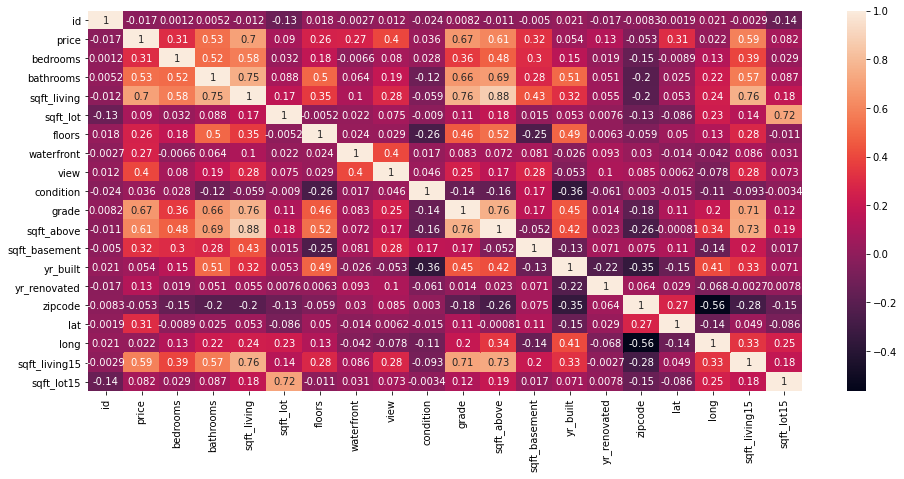

In [27]:
#Below, some of a few correlated features.
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)


C:\Users\Login\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

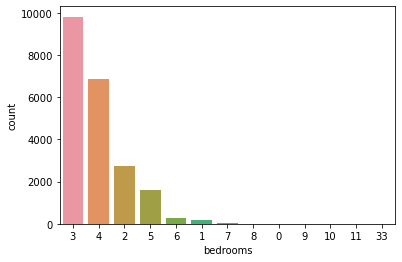

In [28]:
#A countplot is plotted for bedrooms.
sns.countplot(df.bedrooms,order=df['bedrooms'].value_counts().index)


In [29]:
#A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram)
#is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically 
#two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed.

<AxesSubplot:xlabel='yr_built', ylabel='price'>

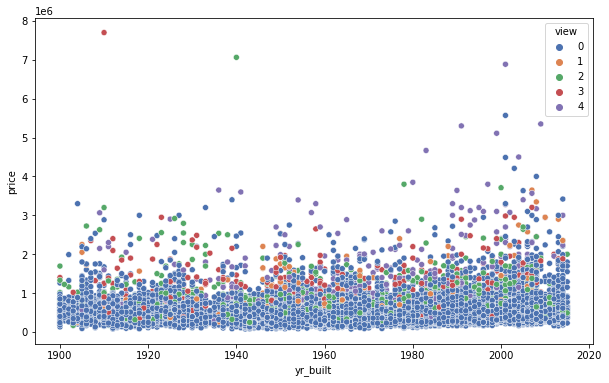

In [35]:
#Now, let's see how the price changed along the years.
resizeplot(10,6)
sns.scatterplot(x='yr_built',y='price',data=df,hue='view',palette = 'deep')

<AxesSubplot:xlabel='yr_built', ylabel='price'>

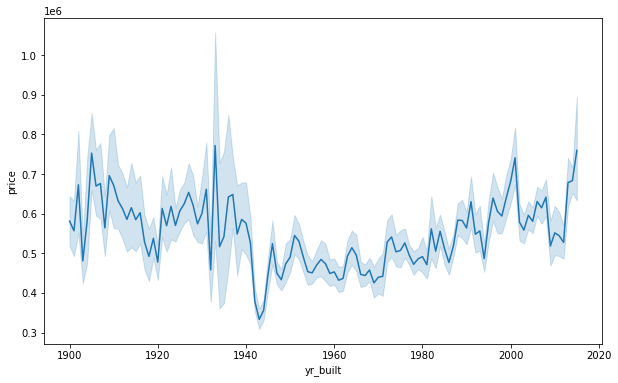

In [31]:
resizeplot(10,6)
sns.lineplot(x='yr_built',y='price',data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

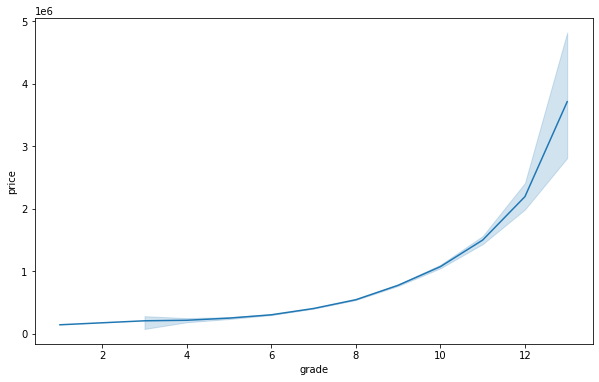

In [32]:
#And of course, the higher the grade the higher the price
#the price does not vary much between 2 and 6, probably due to the similarity of the houses.

resizeplot(10,6)
sns.lineplot(x='grade',y='price',data=df,palette='terrain')

<Figure size 720x432 with 0 Axes>

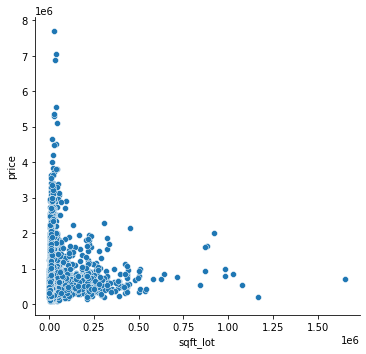

In [41]:
resizeplot(10,6)
sns.relplot(x='sqft_lot',y='price',data=df,palette='terrain')

In [ ]:
resizeplot(10,6)
sns.lineplot(x='sqft_lot',y='price',data=df,palette='terrain')

In [ ]:
#As we can see bellow, there is a much more residences without a View than the others.
resizeplot(10,5)
sns.countplot(x='view',data=df)

In [ ]:
#an analysis relating the number of rooms with a view to the price of the property.
print('Mean of 1 room with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==1)]['price'].mean())
print('Mean of 1 room without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==1)]['price'].mean())

In [ ]:
print('Mean of 2 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==2)]['price'].mean())
print('Mean of 2 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==2)]['price'].mean())

In [ ]:
print('Mean of 3 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==3)]['price'].mean())
print('Mean of 3 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==3)]['price'].mean())

In [ ]:
print('Mean of 4 rooms with view: ',df.loc[(df['waterfront']==1)&(df['bedrooms']==4)]['price'].mean())
print('Mean of 4 rooms without view: ',df.loc[(df['waterfront']==0)&(df['bedrooms']==4)]['price'].mean())

In [ ]:
#A barplot is plotted between the sqft above and prices to see how the price changes with the sqft above
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_above',y='price',data=df)

In [ ]:
#A histogram is plotted for sqft living.
plt.hist('sqft_living',data=df,bins=5)

In [ ]:
#Let's start creating our models

In [ ]:
df.info()

In [ ]:
X = df[['bedrooms','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
lr = LinearRegression()

In [ ]:
 #fit method to “fit” the model to our dataset

lr.fit(X_train,y_train)

In [ ]:
# created our model and trained it, it is time we test the model with our testing dataset.

pred_lr = lr.predict(X_test)

In [ ]:
score_lr = lr.score(X_train,y_train)
print(score_lr)

In [ ]:
#KNN Algoritham

train_data,test_data=train_test_split(df,train_size=0.7,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['sqft_living']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['sqft_living']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)

mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R sqaured testing',round(reg.score(x_test,y_test),4) )
print('intercept',reg.intercept_)
print('coefficient',reg.coef_)

In [ ]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(x_test, y_test, color= 'green', label = 'data')
plt.plot(x_test, reg.predict(x_test), color='red', label= ' Predicted Regression line')
plt.xlabel('Living Space (sqft)')
plt.ylabel('price')
plt.legend()
#plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['right'].set_visible(False)

In [ ]:
train_data,test_data=train_test_split(df,train_size=0.8,random_state=3)
reg=linear_model.LinearRegression()
x_train=np.array(train_data['grade']).reshape(-1,1)
y_train=np.array(train_data['price']).reshape(-1,1)
reg.fit(x_train,y_train)

x_test=np.array(test_data['grade']).reshape(-1,1)
y_test=np.array(test_data['price']).reshape(-1,1)
pred=reg.predict(x_test)
print('linear model')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('squared mean error',round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(x_train,y_train),3))
print('R squared testing',round(reg.score(x_test,y_test),3))
print('intercept',reg.intercept_)
print('coeeficient',reg.coef_)

In [ ]:
#Multiple Linear Regression

In [ ]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=train_data['grade'],y=train_data['price'],ax=ax[0])
sns.boxplot(x=train_data['bedrooms'],y=train_data['price'],ax=ax[1])
_ , axes = plt.subplots(1, 1, figsize=(15,10))
sns.boxplot(x=train_data['bathrooms'],y=train_data['price'])

In [ ]:
features1=['bedrooms','grade','sqft_living','sqft_above']
reg=linear_model.LinearRegression()
reg.fit(train_data[features1],train_data['price'])
pred=reg.predict(test_data[features1])
print('complex_model 1')
mean_squared_error=metrics.mean_squared_error(y_test,pred)
print('mean squared error(MSE)', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(reg.score(train_data[features1],train_data['price']),3))
print('R squared training', round(reg.score(test_data[features1],test_data['price']),3))
print('Intercept: ', reg.intercept_)
print('Coefficient:', reg.coef_)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)